Package Used

In [46]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Function Declaration

In [47]:
def white_balance(img):
    result = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    avg_a = np.average(result[:, :, 1])
    avg_b = np.average(result[:, :, 2])
    result[:, :, 1] = result[:, :, 1] - ((avg_a - 128) * (result[:, :, 0] / 255.0) * 1.1)
    result[:, :, 2] = result[:, :, 2] - ((avg_b - 128) * (result[:, :, 0] / 255.0) * 1.1)
    result = cv2.cvtColor(result, cv2.COLOR_LAB2BGR)
    return result


def gamma_correction(src, gamma):
    inv_gamma = 1 / gamma

    table = [((i / 255) ** inv_gamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)

    return cv2.LUT(src, table)   

def view_image(image, title=None, conversion=cv2.COLOR_BGR2RGB):

    image = cv2.cvtColor(image, conversion)

    plt.imshow(image)

    plt.xticks([])
    plt.yticks([])

    if title is not None:
        plt.title(title)

    plt.show()

def view_double_image(image1, image2,title=None, conversion=cv2.COLOR_BGR2RGB):

    image = cv2.cvtColor(image1, conversion)
    image2 = cv2.cvtColor(image2, conversion)

    fig, ax = plt.subplots(1,2)
    

    ax[0].imshow(image)
    ax[1].imshow(image2)

    ax[0].axis('off')
    ax[1].axis('off')

    if title is not None:
        plt.title(title)

    plt.show()



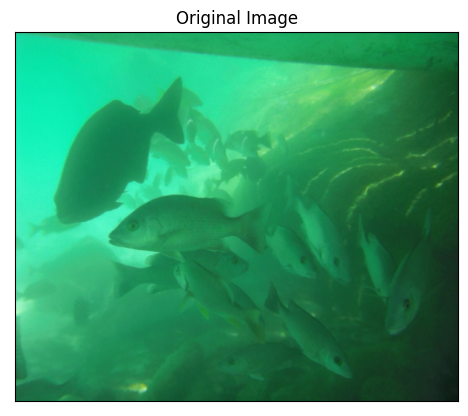

In [48]:
image = cv2.imread("uwi.jpg.png") 
image = cv2.resize(image, (600, 500))

view_image(image,'Original Image') 

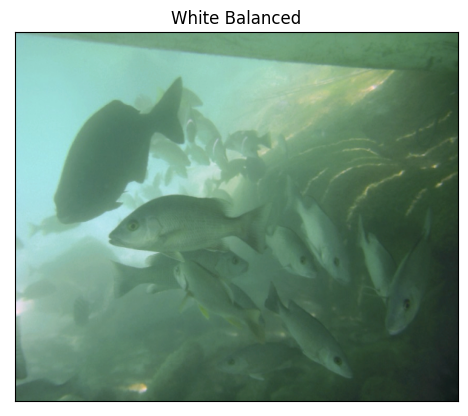

In [49]:
image_w_balanced = white_balance(image);
view_image(image_w_balanced,'White Balanced')

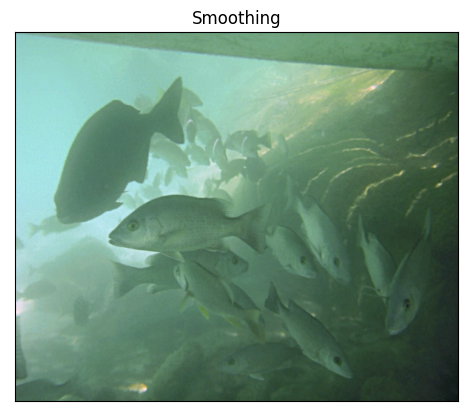

In [50]:
smoothed = cv2.GaussianBlur(image_w_balanced, (9, 9), 10)
unsharped = cv2.addWeighted(image_w_balanced, 1.5, smoothed, -0.5, 0) 
view_image(unsharped,'Smoothing')

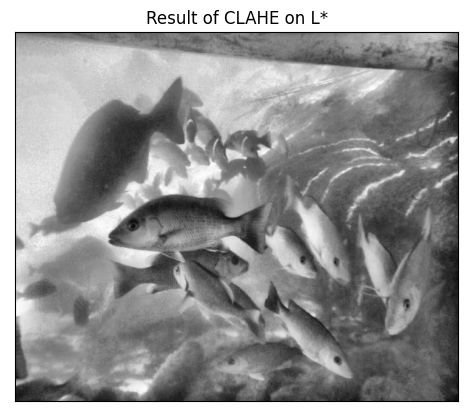

In [51]:
image_modified = cv2.cvtColor(image_w_balanced, cv2.COLOR_BGR2LAB) 
clahe = cv2.createCLAHE(clipLimit = 5)
final_img = clahe.apply(image_modified[:,:,0]) 
image_modified[:,:,0] = final_img
image_final_LAB = cv2.cvtColor(image_modified, cv2.COLOR_LAB2BGR)
view_image(final_img,'Result of CLAHE on L*')

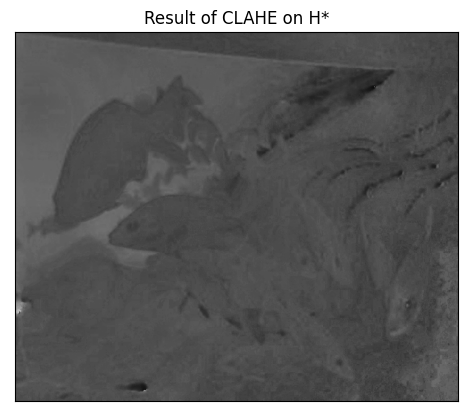

In [52]:

image_modified = cv2.cvtColor(image_w_balanced, cv2.COLOR_BGR2HSV)
clahe = cv2.createCLAHE(clipLimit = 1)
final_img = clahe.apply(image_modified[:,:,0]) 
image_modified[:,:,0] = final_img
image_final_HSV = cv2.cvtColor(image_modified, cv2.COLOR_HSV2BGR)
view_image(final_img,'Result of CLAHE on H*')



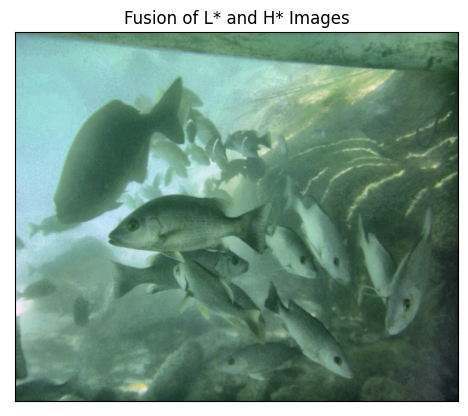

In [53]:
dst = cv2.addWeighted(image_final_LAB,0.5,image_final_HSV,0.5,0)
view_image(dst,'Fusion of L* and H* Images')

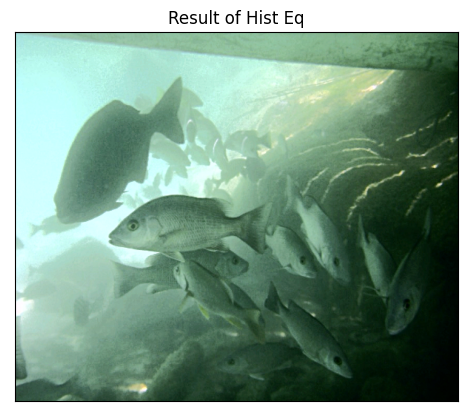

In [54]:
img_yuv = cv2.cvtColor(unsharped,cv2.COLOR_BGR2YUV) 
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
hist_eq = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
view_image(hist_eq,'Result of Hist Eq')
 

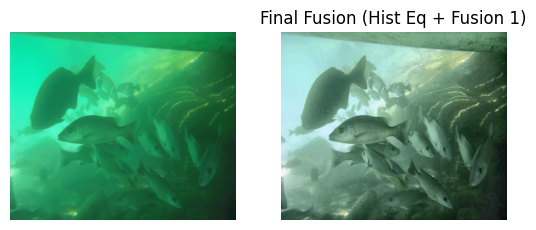

In [55]:
final_fusion = cv2.addWeighted(dst,0.5,hist_eq,0.5,0)
view_double_image(image,final_fusion,'Final Fusion (Hist Eq + Fusion 1)')